**Problem 1 (50 pontos)**

Consider the following data and the third-order Lagrange function.

| $k$ | $t$ | $x(t)$ |
| --- |---|---|
| 1 | 1.0 | 5 |
| 2 | 2.5 | 6 |
| 3 | 3.0 | 3 |
| 4 | 4.5 | 1 |
| 5 | 6.0 | 2 |

In [88]:
# librarie
import numpy as np

# Given data
t_all = np.array([1.0, 2.5, 3.0, 4.5, 6.0], dtype=float)
x_all = np.array([5.0, 6.0, 3.0, 1.0, 2.0], dtype=float)

# Select nodes
def lagrange_basis(ts): # Lagrange basis polynomials
    n = len(ts) # number of nodes
    basis = [] # list of basis polynomials
    for k in range(n): # for each basis polynomial L_k
        Lk = np.poly1d([1.0]) # start with L_k = 1
        denom = 1.0 # denominator
        for j in range(n): # for each node t_j
            if j == k: # skip j = k
                continue # skip j = k
            Lk *= np.poly1d([1.0, -ts[j]])   # multiply by (t - t_j)
            denom *= (ts[k] - ts[j])         # product of (t_k - t_j)
        basis.append(Lk/denom) # append L_k(t) = product / denominator
    return basis

# Nodes sets
def lagrange_poly(ts, ys): # Lagrange polynomial
    basis = lagrange_basis(ts) # get basis polynomials
    P = np.poly1d([0.0]) # start with P = 0
    for Lk, yk in zip(basis, ys): # for each basis polynomial L_k and value y_k
        P += yk * Lk # add y_k * L_k to P
    return P, basis

def poly_coeffs(P, degree=3): # get polynomial coefficients
    c = np.poly1d(P).coef # get coefficients
    if len(c) < (degree+1): # if degree is less than required
        c = np.pad(c, (degree+1-len(c), 0), constant_values=0.0) # pad with zeros
    return c[:degree+1]

a) Find, mathematically, each of the constituent polynomials;

Since this is a third-order polynomial in $k$ = 5, only the most recent $s + 1$ = 4 samples ($k$ = 2, 3, 4, 5) are needed.


$$ L_i(t) = x_i \prod_{j=0,j\neq i}^s\frac{t-t_j}{t_i-t_j} $$

Calculating each polynomial,

$$
\begin{gathered}
L_{2.5}(t)= \frac{(t-3.0)(t-4.5)(t-6.0)}{(2.5-3.0)(2.5-4.5)(2.5-6.0)}= - \frac{2}{7}t^3 + \frac{27}{7}t^2 - \frac{117}{7}t + \frac{162}{7} = -0.2857t^3 - 3.8571t^2 - 16.7142t + 23.1428 \\\\
L_{3.0}(t)= \frac{(t-2.5)(t-4.5)(t-6.0)}{(3.0-2.5)(3.0-4.5)(3.0-6.0)}=\frac{4}{9}t^3 - \frac{52}{9}t^2 + \frac{71}{3}t - 30 = 0.4444t^3 - 5.7778t^2 + 23.6667t - 30 \\\\
L_{4.5}(t)= \frac{(t-2.5)(t-3.0)(t-6.0)}{(4.5-2.5)(4.5-3.0)(4.5-6.0)}= - \frac{2}{9}t^3 + \frac{23}{9}t^2 - 9t + 10 = -0.2222t^3 + 2.5555t^2 - 9t + 10 \\\\
L_{6.0}(t)= \frac{(t-2.5)(t-3.0)(t-4.5)}{(6.0-2.5)(6.0-3.0)(6.0-4.5)}=\frac{4}{63}t^3 - \frac{40}{63}t^2 + \frac{43}{12}t -\frac{15}{7} = 0.0634t^3 - 0.6349t^2 + 2.0476t - 2.1428 \\\\
\end{gathered}
$$

In [89]:
# Routine to check Constituent polynomials
# Node sets (last 4 nodes)
idx_last4  = [1, 2, 3, 4]   # 2.5, 3.0, 4.5, 6.0

t_last4 = t_all[idx_last4] # 2.5, 3.0, 4.5, 6.0
x_last4 = x_all[idx_last4] # 6.0, 3.0, 1.0, 2.0

# Build basis lists
basis_last4  = lagrange_basis(t_last4) # basis for last 4 nodes

# Print basis in expanded power form
def print_basis(ts, basis, title):
    print(title)
    for k, Lk in enumerate(basis):
        c = poly_coeffs(Lk, degree=3)
        print(f"L_{k}(t) for nodes {list(ts)}:")
        print(f"  = ({c[0]: .4f}) t^3 + ({c[1]: .4f}) t^2 + ({c[2]: .4f}) t + ({c[3]: .4f})")
    print()

print_basis(t_last4,  basis_last4,  "Constituent polynomials for nodes [2.5, 3.0, 4.5, 6.0]")


Constituent polynomials for nodes [2.5, 3.0, 4.5, 6.0]
L_0(t) for nodes [2.5, 3.0, 4.5, 6.0]:
  = (-0.2857) t^3 + ( 3.8571) t^2 + (-16.7143) t + ( 23.1429)
L_1(t) for nodes [2.5, 3.0, 4.5, 6.0]:
  = ( 0.4444) t^3 + (-5.7778) t^2 + ( 23.6667) t + (-30.0000)
L_2(t) for nodes [2.5, 3.0, 4.5, 6.0]:
  = (-0.2222) t^3 + ( 2.5556) t^2 + (-9.0000) t + ( 10.0000)
L_3(t) for nodes [2.5, 3.0, 4.5, 6.0]:
  = ( 0.0635) t^3 + (-0.6349) t^2 + ( 2.0476) t + (-2.1429)



b) Find, mathematically, the Lagrange polynomial;

$$
\begin{gathered}
P_3(t)= \sum_{k=0}^3 x_k L_k(t) = 6L_0(t) + 3L_1(t) + 1L_2(t) + 2L_3(t)
\end{gathered}
$$

$$
\begin{gathered}
P_3(t)= - \frac{10}{21}t^3 + \frac{149}{21}t^2 - \frac{718}{21}t + \frac{382}{7} = P_3(t) \approx -0.4762t^3 + 7.0952t^2 - 34.1904t + 54.5714
\end{gathered}
$$

In [90]:
P_last4,  _ = lagrange_poly(t_last4,  x_last4)

c2 = poly_coeffs(P_last4,  degree=3)

print("P3 using nodes [2.5, 3.0, 4.5, 6.0]:")
print(f"P3(t) = ({c2[0]: .4f}) t^3 + ({c2[1]: .4f}) t^2 + ({c2[2]: .4f}) t + ({c2[3]: .4f})")

P3 using nodes [2.5, 3.0, 4.5, 6.0]:
P3(t) = (-0.4762) t^3 + ( 7.0952) t^2 + (-34.1905) t + ( 54.5714)


c) Compare the polynomials found with the results obtained using the Lagrange function.


Coefficient comparison:
Term           Analytical   SciPy lagrange f         Difference
t^3               -0.4762            -0.4762             0.0000
t^2                7.0952             7.0952             0.0000
t^1              -34.1905           -34.1905             0.0000
t^0               54.5714            54.5714             0.0000


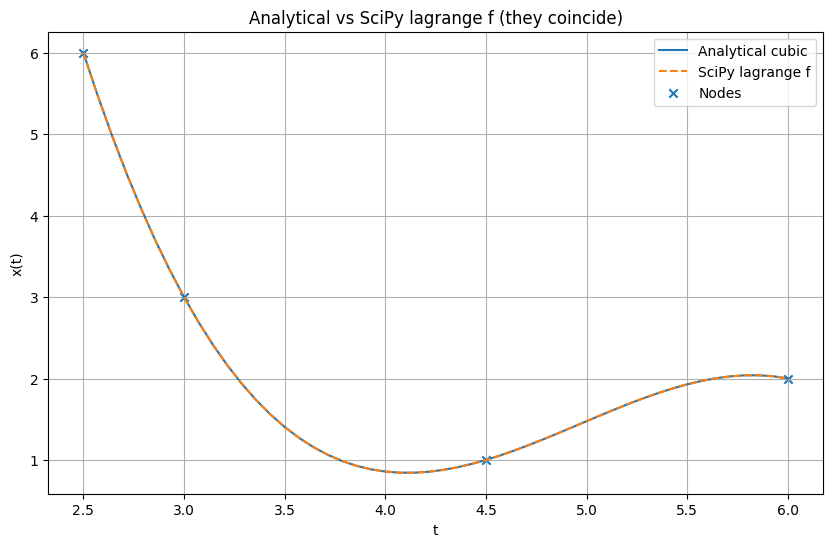

In [91]:
# libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import lagrange 

# four last nodes
t_nodes = np.array([2.5, 3.0, 4.5, 6.0], dtype=float)
x_nodes = np.array([6.0, 3.0, 1.0, 2.0], dtype=float)

# Analytical polynomial coefficients
# P3(t) = a t^3 + b t^2 + c t + d
coeff_analytical = np.array([-10/21, 149/21, -718/21, 382/7], dtype=float)
P_analytical = np.poly1d(coeff_analytical)

# SciPy Lagrange function
P_other = lagrange(t_nodes, x_nodes)  # return numpy.poly1d
other_label = "SciPy lagrange f"
coeff_other = poly_coeffs(P_other, degree=3)  # get coefficients

# Side-by-side coefficients and numeric checks
deg_labels = ["t^3", "t^2", "t^1", "t^0"]
print("\nCoefficient comparison:")
print("{:<6} {:>18} {:>18} {:>18}".format("Term","Analytical","SciPy lagrange f","Difference"))

for label, ca, cb in zip(deg_labels, coeff_analytical, coeff_other):
    print("{:<6} {:>18.4f} {:>18.4f} {:>18.4f}".format(label, ca, cb, abs(ca-cb)))

# Plot overlay
t_grid = np.linspace(2.5, 6.0)

plt.figure(figsize=(10,6))
plt.plot(t_grid, P_analytical(t_grid), label="Analytical cubic")
plt.plot(t_grid, P_other(t_grid), linestyle="--", label=other_label)
plt.scatter(t_nodes, x_nodes, marker="x", label="Nodes")
plt.title("Analytical vs {} (they coincide)".format(other_label))
plt.xlabel("t"); plt.ylabel("x(t)")
plt.legend(); plt.grid(True)
plt.show()



**Comments**

When compared the expressions, we see that the constituent Lagrange polynomials are the essential parts used to build the final Lagrange interpolating polynomial.

Regarding the comparison between the polynomials calculated manually and those obtained using the built-in Lagrange function from scipy.interpolate, the results were, as expected, identical.

d) Using the polynomial found, extrapolate an estimate of the function 
for t= 7. Analyze all the results found e provide the proper comments.

P3(7) with nodes [2.5, 3.0, 4.5, 6.0]: -0.428571


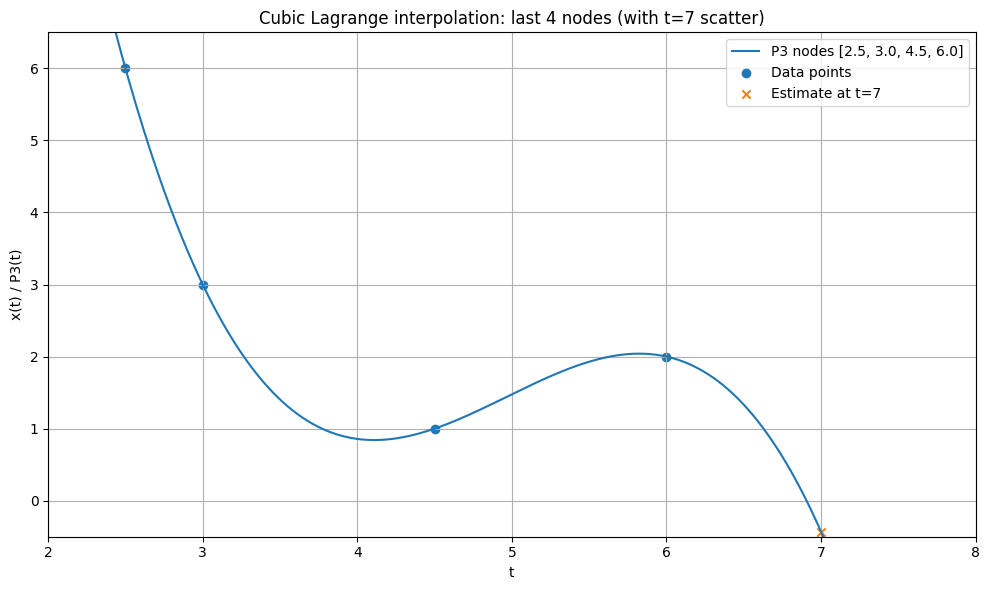

In [ ]:
t_ex = 7.0 # extrapolation point
p_7 = float(np.poly1d(P_last4)(t_ex)) # evaluate P3 at t=7.0

print(f"P3(7) with nodes [2.5, 3.0, 4.5, 6.0]: {p_7:.6f}")
tt = np.linspace(t_all.min()-0.5, t_all.max()+2.5, 500) 
y = np.poly1d(P_last4)(tt) # evaluate P3 at all points in tt

# plot both interpolations
t_grid = np.linspace(2.5, 6.0) # zoomed-in grid
y_grid = np.poly1d(P_last4)(t_grid) # evaluate P3 at all points in t_grid

plt.figure(figsize=(10,6))
plt.plot(tt, y, label="P3 nodes [2.5, 3.0, 4.5, 6.0]")
plt.scatter(t_all, x_all, label="Data points")

# mark the estimate at t=7.0
plt.scatter(t_ex, p_7, marker="x", label="Estimate at t=7")

plt.xlabel("t")
plt.ylabel("x(t) / P3(t)")
plt.title("Cubic Lagrange interpolation: last 4 nodes (with t=7 scatter)")
plt.legend()
plt.grid()
plt.xlim(2.0, 8.0)
plt.ylim(-0.5, 6.5)
plt.tight_layout()
plt.show()

**Comments**

The extrapolated value at t=7, obtained from the last four interpolation nodes [2.5,3.0,4.5,6.0], aligns well with the local behavior of the function in the vicinity of t=6, indicating coherence with the expected trend. 

These results illustrate that interpolation approach can be safely extended slightly beyond the observed range when the system’s dynamics remain smooth and predictable in that region.

**Problem 2 (50 points)**

Consider the continuous signal x(t) = 2 cos(5t) + 7 sin(10t), which is 
sampled at a frequency of 20 samples per second. Assuming a granularity 
of h= 0.01 seconds:

a) Write a routine to extrapolate the signal with zero order holder.

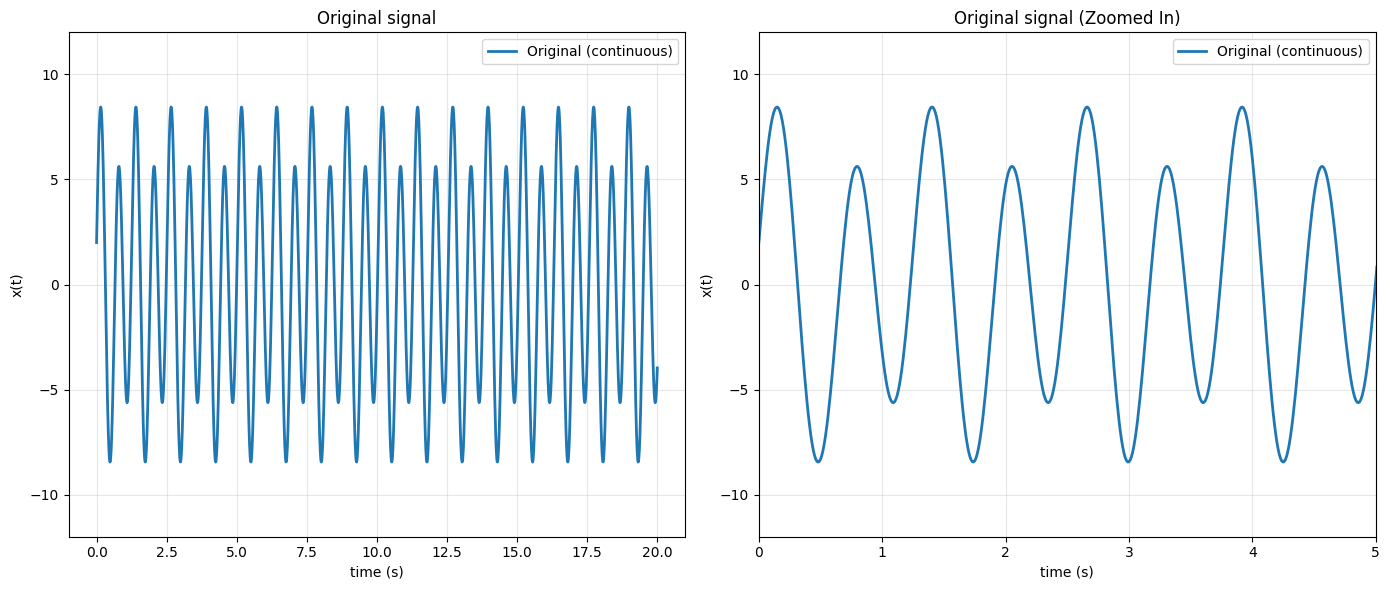

In [93]:
import numpy as np
import matplotlib.pyplot as plt

# Continuous-time signal
def x_true(t):
    return 2*np.cos(5*t) + 7*np.sin(10*t) # original signal

fs = 20.0                  # samples per second
Ts = 1.0/fs                # sampling interval
h  = 0.01                  # granularity
T_end = 20.0               # total duration (seconds)

# Time grids
t_cont = np.arange(0.0, T_end + h, h)      # "continuous" grid for display
t_s    = np.arange(0.0, T_end + Ts, Ts)    # sampling instants

# Samples
x_s = x_true(t_s) # sampled signal
x_c = x_true(t_cont) # continuous signal for display

fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Full view
axs[0].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x(t)")
axs[0].set_title("Original signal")
axs[0].grid(True, alpha=0.3)
axs[0].set_ylim(-12, 12)
axs[0].legend(loc='upper right')

# Plot 2: Zoomed-in view
axs[1].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Original signal (Zoomed In)")
axs[1].grid(True, alpha=0.3)
axs[1].set_ylim(-12, 12)
axs[1].set_xlim(0, 5)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

b) Show the graph of the original signal and its zero-order approximation.

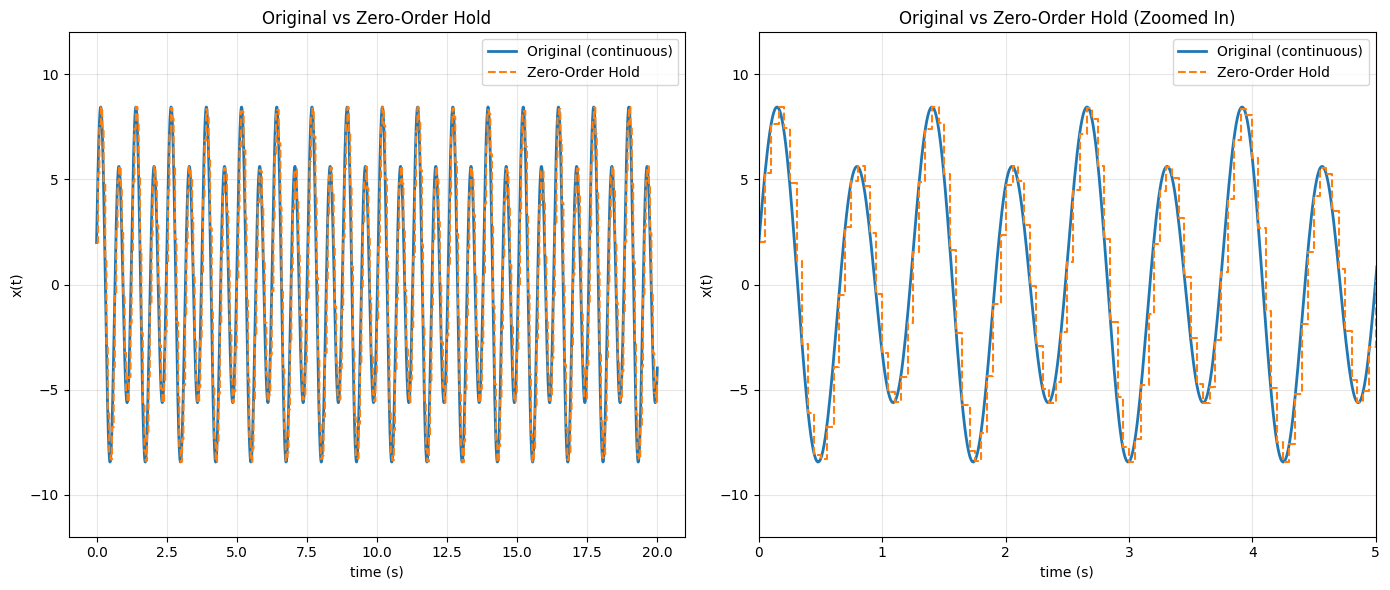

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# (a) Zero-Order Hold routine
def zoh_reconstruct(t_eval, t_samples, x_samples):
    idx = np.searchsorted(t_samples, t_eval, side="right") - 1
    idx = np.clip(idx, 0, len(x_samples)-1)
    return x_samples[idx]

x_zoh = zoh_reconstruct(t_cont, t_s, x_s)


fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Full view
axs[0].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[0].step(t_cont, x_zoh, where="post", label="Zero-Order Hold", linestyle="--")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x(t)")
axs[0].set_title("Original vs Zero-Order Hold")
axs[0].grid(True, alpha=0.3)
axs[0].set_ylim(-12, 12)
axs[0].legend(loc='upper right')

# Plot 2: Zoomed-in view
axs[1].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[1].step(t_cont, x_zoh, where="post", label="Zero-Order Hold", linestyle="--")
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Original vs Zero-Order Hold (Zoomed In)")
axs[1].grid(True, alpha=0.3)
axs[1].set_ylim(-12, 12)
axs[1].set_xlim(0, 5)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

c) Show the graph of the original signal and its second-order approximation.

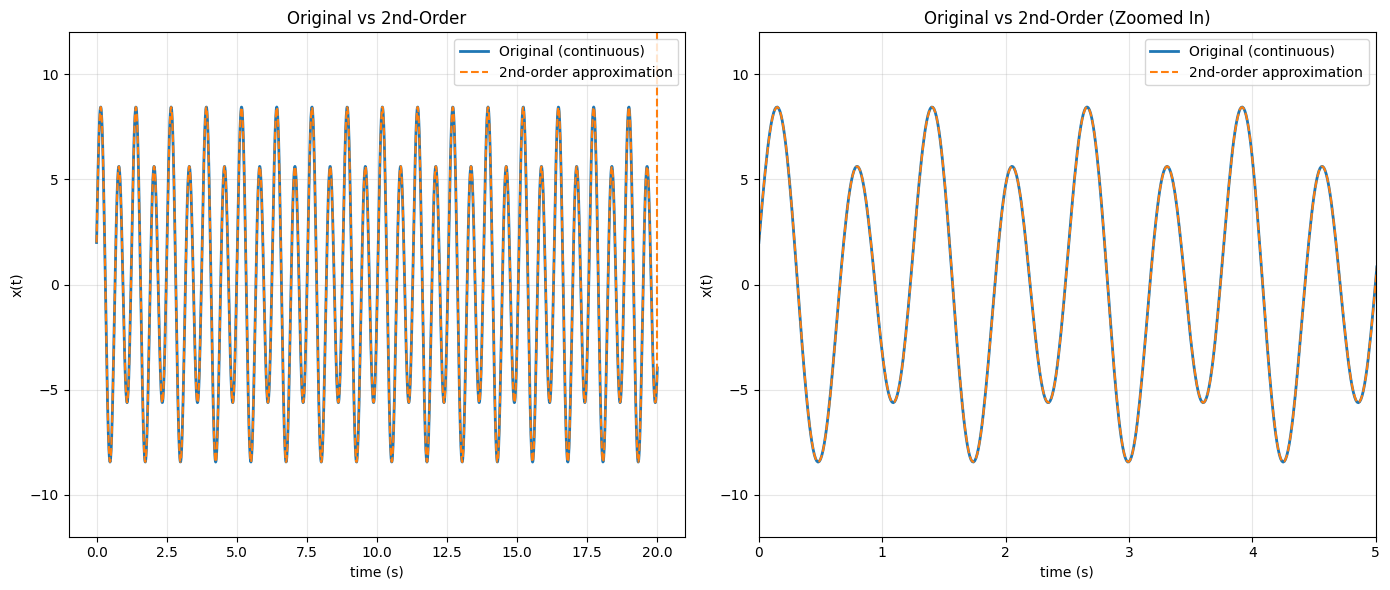

In [95]:
import numpy as np
import matplotlib.pyplot as plt

# (c) 2nd-order (quadratic) approximation
def quad_local_reconstruct(t_eval, t_samples, x_samples):
    y = np.empty_like(t_eval, dtype=float)
    N = len(t_samples)

    # For last time point, include it in the last interval mask
    for i in range(N-1):
        if i < N-2:
            mask = (t_eval >= t_samples[i]) & (t_eval < t_samples[i+1])
        else:
            mask = (t_eval >= t_samples[i]) & (t_eval <= t_samples[i+1])

        if not np.any(mask):
            continue

        if i == 0:
            idxs = [0, 1, 2] if N >= 3 else list(range(min(3, N)))
        elif i == N-2:
            idxs = [N-3, N-2, N-1] if N >= 3 else list(range(max(0, N-3), N))
        else:
            idxs = [i-1, i, i+1]

        t_nodes = t_samples[idxs] # time nodes
        x_nodes = x_samples[idxs] # corresponding sample values

        # Fit quadratic and evaluate
        coeffs = np.polyfit(t_nodes, x_nodes, 2)  # degree 2
        y[mask] = np.polyval(coeffs, t_eval[mask]) #

    return y

x_quad = quad_local_reconstruct(t_cont, t_s, x_s)



fig, axs = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns

# Plot 1: Full view
axs[0].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[0].plot(t_cont, x_quad, label="2nd-order approximation", linestyle="--")
axs[0].set_xlabel("time (s)")
axs[0].set_ylabel("x(t)")
axs[0].set_title("Original vs 2nd-Order")
axs[0].grid(True, alpha=0.3)
axs[0].set_ylim(-12, 12)
axs[0].legend(loc='upper right')

# Plot 2: Zoomed-in view
axs[1].plot(t_cont, x_c, label="Original (continuous)", lw=2)
axs[1].plot(t_cont, x_quad, label="2nd-order approximation", linestyle="--")
axs[1].set_xlabel("time (s)")
axs[1].set_ylabel("x(t)")
axs[1].set_title("Original vs 2nd-Order (Zoomed In)")
axs[1].grid(True, alpha=0.3)
axs[1].set_ylim(-12, 12)
axs[1].set_xlim(0, 5)
axs[1].legend(loc='upper right')

plt.tight_layout()
plt.show()

d) Analyze the results and provide the proper comments.

The zero-order hold approximation maintains each sampled value constant until the arrival of the next sample. While this method is simple and computationally efficient, it fails to represent the intersample dynamics of the underlying continuous signal. As a result, the reconstructed waveform may exhibit a piecewise-constant appearance, producing abrupt transitions that underestimate the signal’s true curvature and introduce significant distortion.

In contrast, a quadratic (second-order) approximation captures not only the amplitude but also the local curvature of the signal between samples. By fitting a parabolic segment through consecutive data points, it produces a smoother and more realistic interpolation of the system’s continuous behavior. This approach reduces approximation error, improves the fidelity of dynamic responses, and is particularly valuable in control systems, signal reconstruction, and numerical simulation of dynamic models where accurate representation of transient behavior is essential.
